In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [19]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [20]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[163.22694201 197.72921792 120.5858612 ]
 [107.71855904  95.58709291  71.6153663 ]]
[[183.82728495 182.55756698 164.66750049]
 [160.65283382 204.76173614 114.7080043 ]
 [143.70177388 128.05518749  96.94009689]
 [ 57.86391334  54.79660679  45.96702378]]


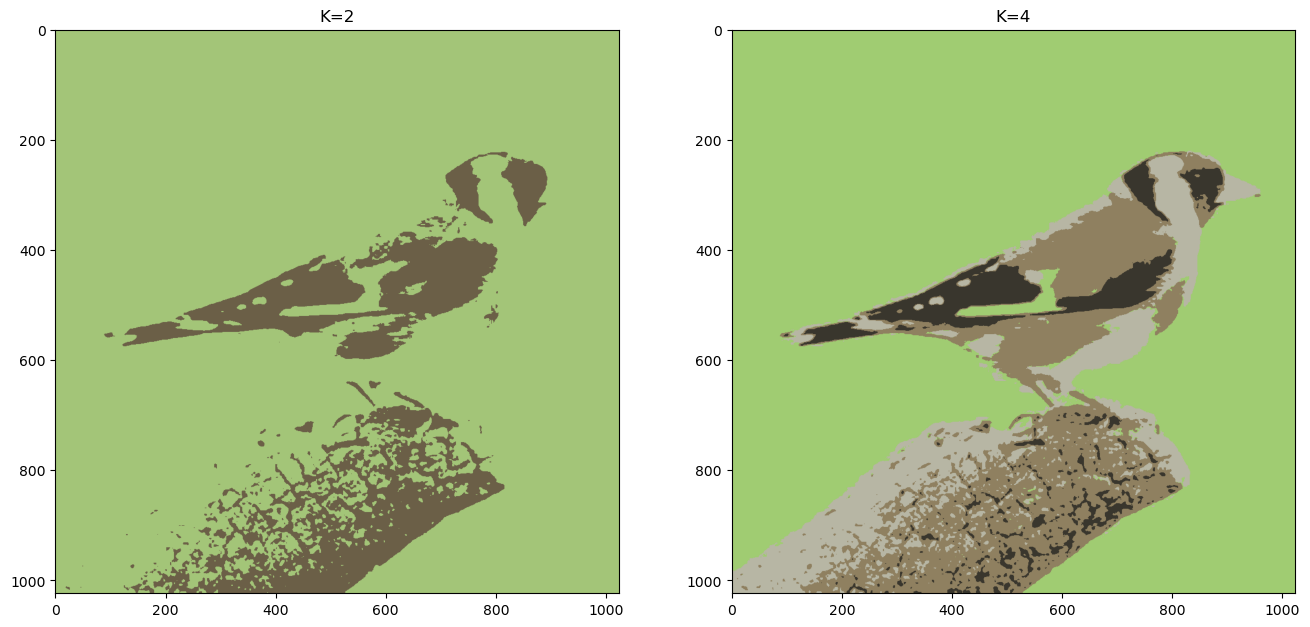

In [27]:
h, w, c = img.shape
print(img.shape)
Z = img.reshape((-1, 3))
Z.shape
Z
Ka = [2,4]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center = km_clust(Z, K)
    #convert back into uint8 , and make original image
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)

    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)
plt.show()

In [17]:
#label.flatten().shape

(1048576,)

## 1-2. cluster with RGB values and the location

[[154.41586959 186.42260805 117.03167802 512.69225918 255.005158  ]
 [156.4749891  180.41709387 110.42649592 510.31238447 766.99583675]]
[[155.62106267 177.62082245 109.44824128 255.11220712 766.80397689]
 [157.19049519 179.1729197  122.99361589 768.94411215 255.27312419]
 [151.7161119  193.78252797 111.14163969 256.69384766 254.95170121]
 [157.27718105 183.03149292 111.37493579 766.85829519 767.41331553]]
[[157.88258438 183.1227921  114.70841148 175.49968741 860.99524869]
 [146.27962979 144.54342887 104.3067255  823.15351567 519.28330712]
 [152.43505131 194.75026652 112.00236541 176.55967651 161.90710788]
 [160.49504218 203.27969648 117.83638365 844.17626298 866.13364257]
 [148.25466382 187.59704316 110.85935491 514.63280529 244.72873425]
 [164.82307259 189.46869561 134.41613208 847.27710644 164.91518723]
 [157.57590636 196.43446047 111.29362832 199.56026738 509.08201037]
 [157.99974287 173.50105899 107.96318927 507.05357179 772.30936576]]


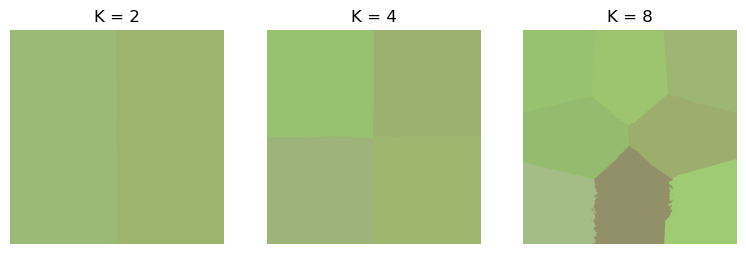

In [30]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[153.0217526  174.46256273 108.06446058 133.01094677 187.20030748]
 [158.19538028 193.55463345 120.13252419 122.05673412  60.66822627]]
[[157.87764956 192.33641742 112.38112058  45.50040877 126.79793134]
 [166.13026405 200.19391468 129.36682595 165.69723374  51.0166815 ]
 [167.57507072 206.36146363 123.00636361 170.43869343 211.59768223]
 [114.249374   102.21298837  76.20763895 173.88722639 137.40733314]]
[[162.73170705 145.19666469 105.93195531 124.24085757 156.59826218]
 [158.03149832 199.67966086 110.68825832  45.23278409 125.41549047]
 [156.22632821 200.99922099 114.56551469  67.73065027  41.58398299]
 [166.59504057 198.45379883 122.18409511  56.37862804 220.44557086]
 [164.60501994 211.3665174  120.35326985 194.49681218 212.37578017]
 [ 47.13401427  48.03277216  45.96404558 116.66277011 136.70589103]
 [132.12461173 119.80135979  90.19009107 218.42661102 127.94904171]
 [167.98850831 200.40052098 133.60843829 188.18157937  53.07322524]]
[[161.41878381 208.93713536 117.11549273 187.

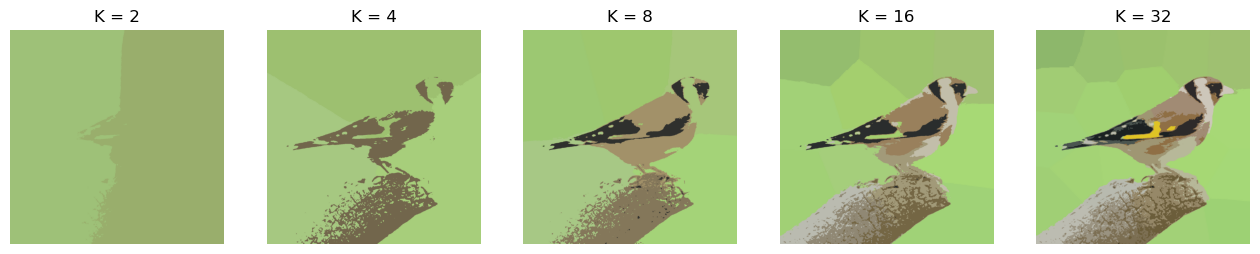

In [33]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()